<a href="https://colab.research.google.com/github/vicotrbb/data_science/blob/master/projects/face-story/face_sizes_and_formats_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2
import numpy as np
import dlib
from IPython.display import Image
from scipy.spatial import distance as dist
import math
from collections import OrderedDict 

In [27]:
from imutils import face_utils
import imutils

In [114]:
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
!ls "/gdrive/My Drive/face-story"

face.JPG  shape_predictor_68_face_landmarks.dat


In [9]:
def calculate_distance(x, y, img_width):
  distance = dist.euclidean(x, y) #math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
  return (distance /  90) * 2.54

In [10]:
def calculate_from_landmark(landmarks, p1, p2, width):
  return calculate_distance((landmarks.part(p1).x, landmarks.part(p1).y),
                                  (landmarks.part(p2).x, landmarks.part(p2).y),
                                  width)

In [32]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/gdrive/My Drive/face-story/shape_predictor_68_face_landmarks.dat")
img = cv2.imread("/gdrive/My Drive/face-story/face.JPG")
original_image = img.copy()
shape = img.shape
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
faces = detector(gray)

x1, x2, y1, y2 = 0,0,0,0

for face in faces:
  x1 = face.left()
  y1 = face.top()
  x2 = face.right() 
  y2 = face.bottom()

  landmarks = predictor(image=gray, box=face) 

  for n in range(0, 68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y       
    cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)
    cv2.putText(img, str(n), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)

  nose_heigth = calculate_from_landmark(landmarks, 27, 30, shape[1])
  face_width = calculate_from_landmark(landmarks, 1, 15, shape[1])
  
  # eyebrows
  left_eyebrows_size = calculate_from_landmark(landmarks, 17, 21, shape[1])
  right_eyebrows_size = calculate_from_landmark(landmarks, 22, 26, shape[1])
  eyebrows_spacing = calculate_from_landmark(landmarks, 21, 22, shape[1])

  # eyes
  left_eye_width = calculate_from_landmark(landmarks, 36, 39, shape[1])
  right_eye_width = calculate_from_landmark(landmarks, 42, 45, shape[1])
  eyes_spacing = calculate_from_landmark(landmarks, 39, 42, shape[1])

  landmarks_shape = face_utils.shape_to_np(landmarks)
  for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
    (x, y, w, h) = cv2.boundingRect(np.array([landmarks_shape[i:j]]))
    roi = original_image[y:y + h, x:x + w]
    roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
    cv2.imwrite(name + '.png', roi)


img = cv2.resize(img, (940, 720))
cv2.imwrite('out.png', img)

True

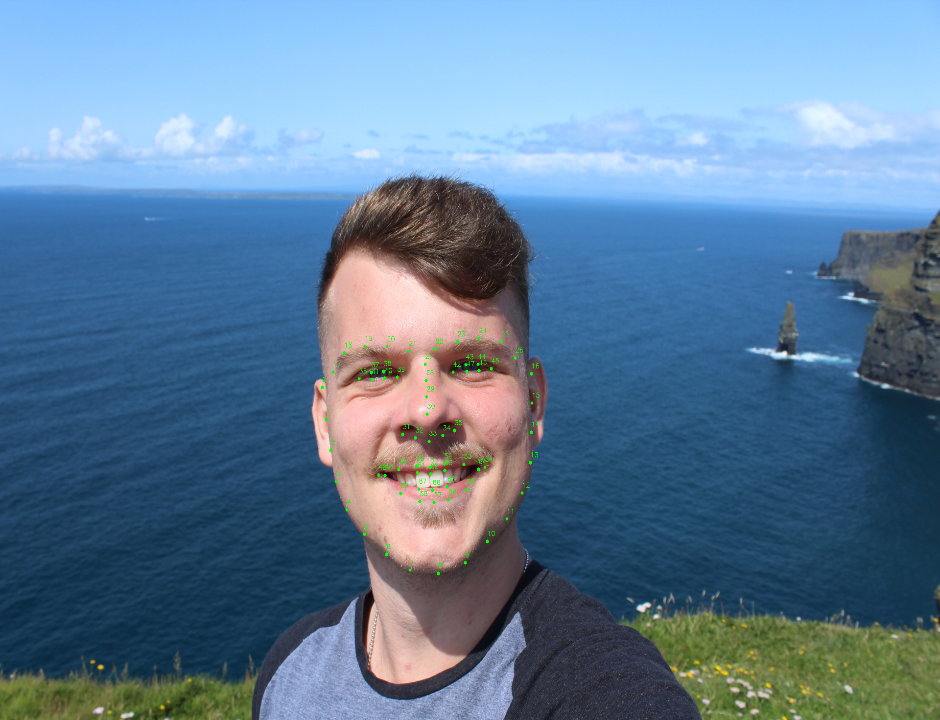

In [30]:
Image('out.png')

In [ ]:
print('altura da imagem: ', shape[0])
print('largura da imagem: ', shape[1])
print('camadas RGB da imagem: ', shape[2])

altura da imagem:  1280
largura da imagem:  1920
camadas RGB da imagem:  3


In [ ]:
img_heigth = (shape[0] / 90) * 2.54 # altura em cm
img_width = (shape[1] / 90) * 2.54 # largura em cm

print('altura em cm: ', img_heigth)
print('largura em cm: ', img_width)

altura em cm:  36.12444444444444
largura em cm:  54.18666666666667


In [ ]:
t1 = (x1, x2)
t2 = (y1, y2)

In [ ]:
t1, t2

((633, 1079), (534, 980))

In [ ]:
print('face width', face_width)
print('nose heigth', nose_heigth)
print('left eyebrows_size', left_eyebrows_size)
print('right eyebrows_size', right_eyebrows_size)
print('eyebrows spacing', eyebrows_spacing)
print('left eye width', left_eye_width)
print('right eye width', right_eye_width)
print('eyes spacing', eyes_spacing)

face width 11.881555555555556
nose heigth 2.514313326968785
left eyebrows_size 4.497350803185535
right eyebrows_size 4.6223313288404855
eyebrows spacing 1.5281753502901976
left eye width 2.2029609367596352
right eye width 2.207836547895297
eyes spacing 3.2273440748977755


## Extracted parts


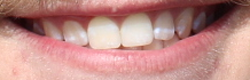

In [39]:
Image('mouth.png')

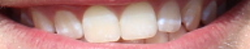

In [40]:
Image('inner_mouth.png')

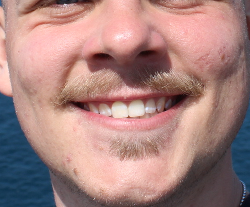

In [35]:
Image('jaw.png')

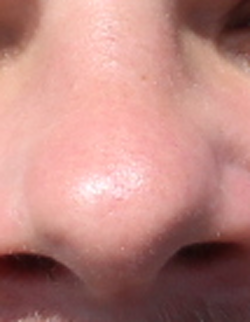

In [37]:
Image('nose.png')

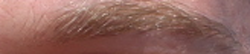

In [38]:
Image('left_eyebrow.png')

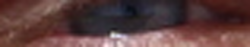

In [46]:
Image('right_eye.png')

## Face parts processing

#### Eyes

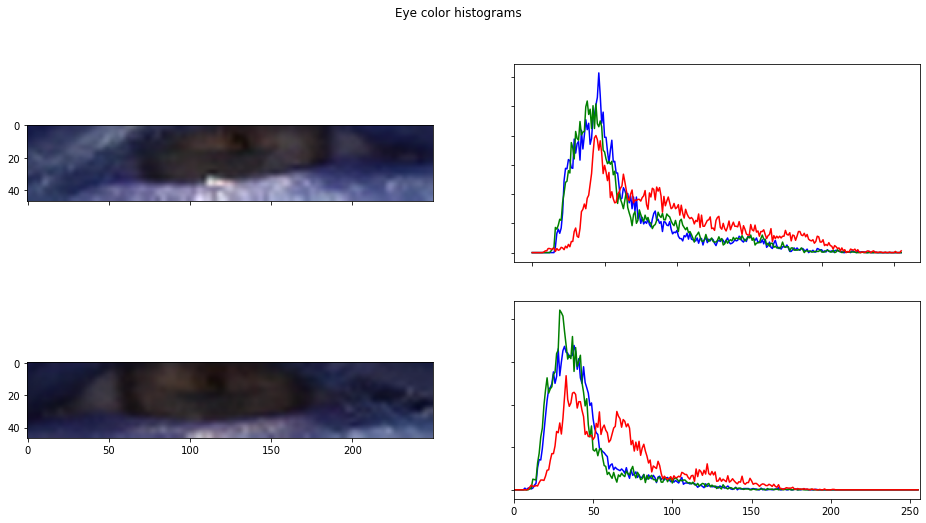

In [113]:
right_eye_img = cv2.imread('right_eye.png')
left_eye_img = cv2.imread('left_eye.png')
color = ('b','g','r')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle('Eye color histograms')

for i, col in enumerate(color):
  right_histr = cv2.calcHist([right_eye_img],[i],None,[256],[0,256])
  left_histr = cv2.calcHist([left_eye_img],[i],None,[256],[0,256])
  ax2.plot(right_histr, color = col)
  ax4.plot(left_histr, color = col)  

ax1.imshow(right_eye_img)
ax3.imshow(left_eye_img)

plt.xlim([0,256])

for ax in fig.get_axes():
    ax.label_outer()

In [91]:
blue = cv2.calcHist([right_eye_img],[0],None,[256],[0,256])
green = cv2.calcHist([right_eye_img],[1],None,[256],[0,256])
red = cv2.calcHist([right_eye_img],[2],None,[256],[0,256])

In [92]:
blue.max()

339.0

In [93]:
green.max()

422.0

In [94]:
red.max()

268.0